# Unemployment in India Analysis

![Amazon Logo](https://www.thestreet.com/.image/ar_16:9%2Cc_fill%2Ccs_srgb%2Cg_faces:center%2Cq_auto:good%2Cw_768/MTY3NTQxMjMwMDg3ODQxNjc4/6-types-of-unemployment-and-what-makes-them-different.png)



## Contents in this Project

1. **Data Loading and Summary Checking**
2. **Data Cleaning**
3. **Feature Extraction**
4. **EDA and Data Visualization**
5. **Conclusion**

In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("Unemployment Data.csv")

In [5]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [6]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [7]:
data.isnull()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
763,True,True,True,True,True,True,True
764,True,True,True,True,True,True,True
765,True,True,True,True,True,True,True
766,True,True,True,True,True,True,True


In [8]:
data.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

##### Clearly , it can be seen that some null/NA values are here. we will try to remove that on the basis of  most required situations

In [9]:
data.head(1)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural


## Data Cleaning

In [10]:
data = data.rename(columns={data.columns[0]:'State',data.columns[1]:'Date', data.columns[2]:'Freq', data.columns[3]:'EUR',data.columns[4]:'EE', data.columns[5]:'ELPR',data.columns[6]:'Area'})

In [11]:
data.dropna()

,State,Date,Freq,EUR,EE,ELPR,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [12]:
data['Area'].value_counts()

Area
Urban    381
Rural    359
Name: count, dtype: int64

In [13]:
import seaborn as sns


<Axes: xlabel='Area', ylabel='count'>

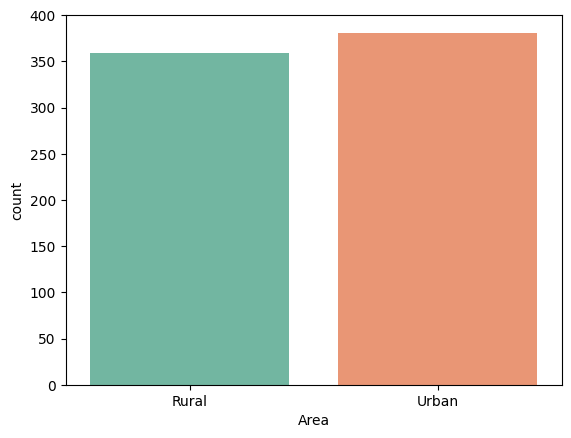

In [14]:
sns.countplot(x=data['Area'], palette="Set2")

In [15]:
import matplotlib.pyplot as plt

ValueError: Could not interpret input 'Region'

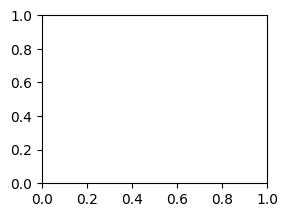

In [17]:
plt.subplot(2, 2, 1)
sns.barplot(x="Region", y="Estimated Employed", data=data)
plt.title("Estimated Employed")